<a href="https://colab.research.google.com/github/alexjercan/depth-estimation/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib==3.3.3

     |████████████████████████████████| 11.6MB 26.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
!git clone https://github.com/alexjercan/depth-estimation.git
%cd depth-estimation

import torch
from IPython.display import clear_output

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [2]:
# Download bdataset
torch.hub.download_url_to_file('https://github.com/alexjercan/depth-estimation/releases/download/v1.0/bdataset_stereo.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip

In [ ]:
torch.hub.download_url_to_file('https://github.com/alexjercan/mesh-pose-reconstruction/releases/download/v1.0/normal.pth', 'normal.pth')

In [8]:
from attr_dict import AttrDict

config_train = AttrDict()

config_train.DATASET_ROOT = "../bdataset_stereo"
config_train.JSON_PATH = "train.json"
config_train.BATCH_SIZE = 8
config_train.IMAGE_SIZE = 256
config_train.WORKERS = 8
config_train.PIN_MEMORY = True
config_train.SHUFFLE = True

config_train.LEARNING_RATE = 0.01
config_train.BETAS = [0.9, 0.999]
config_train.EPS = 0.00000001
config_train.WEIGHT_DECAY = 0.0001

config_train.MILESTONES = [10,20,30]
config_train.GAMMA = 0.2

config_train.NUM_EPOCHS = 40
config_train.TEST = True
config_train.OUT_PATH ="./runs"
config_train.LOAD_MODEL = False
config_train.SAVE_MODEL = False
config_train.CHECKPOINT_FILE = "normal.pth"

config_test = AttrDict()

config_test.DATASET_ROOT = "../bdataset_stereo"
config_test.JSON_PATH = "test.json"
config_test.BATCH_SIZE = 8
config_test.IMAGE_SIZE = 256
config_test.WORKERS = 8
config_test.PIN_MEMORY = True
config_test.SHUFFLE = False

config_test.OUT_PATH = "./runs"
config_test.LOAD_MODEL = True
config_test.CHECKPOINT_FILE = "normal.pth"

config_detect = AttrDict()

config_detect.JSON = [{"imageL": "data/left.png", "imageR": "data/right.png", "output": "data/output.exr"}]
config_detect.IMAGE_SIZE = 256
config_detect.CHECKPOINT_FILE = "normal.pth"

In [9]:
from train import train
train(config_train, config_test)

  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:76.8657 depth:69.9858 normal:6.8799)
                  MSE=21715.0410	RMSE=135.7527	MAE=69.7663	ABS_REL=152.8776
                  DELTA1.02=0.8235	DELTA1.05=0.8327	DELTA1.10=0.8479
                  DELTA1.25=0.8725	DELTA1.25^2=0.9127	DELTA1.25^3=0.9547



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.3251 depth:0.2208 normal:0.1043)
                  MSE=0.1046	RMSE=0.3117	MAE=0.2191	ABS_REL=0.5074
                  DELTA1.02=0.0086	DELTA1.05=0.0317	DELTA1.10=0.6199
                  DELTA1.25=0.7022	DELTA1.25^2=0.7175	DELTA1.25^3=0.7594



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.2990 depth:0.2132 normal:0.0858)
                  MSE=0.0920	RMSE=0.2995	MAE=0.2109	ABS_REL=0.5025
                  DELTA1.02=0.0375	DELTA1.05=0.0918	DELTA1.10=0.6873
                  DELTA1.25=0.7002	DELTA1.25^2=0.7082	DELTA1.25^3=0.7436



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.3062 depth:0.2068 normal:0.0994)
                  MSE=0.0658	RMSE=0.2565	MAE=0.2073	ABS_REL=0.2753
                  DELTA1.02=0.0140	DELTA1.05=0.0375	DELTA1.10=0.1292
                  DELTA1.25=0.5060	DELTA1.25^2=0.8006	DELTA1.25^3=0.9134



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.2053 depth:0.1139 normal:0.0914)
                  MSE=0.0467	RMSE=0.2142	MAE=0.1126	ABS_REL=0.2845
                  DELTA1.02=0.5536	DELTA1.05=0.6480	DELTA1.10=0.6861
                  DELTA1.25=0.7390	DELTA1.25^2=0.8048	DELTA1.25^3=0.8726



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.2616 depth:0.1818 normal:0.0798)
                  MSE=0.0642	RMSE=0.2519	MAE=0.1801	ABS_REL=0.4074
                  DELTA1.02=0.0005	DELTA1.05=0.0018	DELTA1.10=0.6795
                  DELTA1.25=0.7125	DELTA1.25^2=0.7372	DELTA1.25^3=0.8034



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.2265 depth:0.1425 normal:0.0840)
                  MSE=0.0668	RMSE=0.2560	MAE=0.1401	ABS_REL=0.3693
                  DELTA1.02=0.6209	DELTA1.05=0.6939	DELTA1.10=0.7024
                  DELTA1.25=0.7138	DELTA1.25^2=0.7413	DELTA1.25^3=0.8049



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1944 depth:0.1084 normal:0.0860)
                  MSE=0.0308	RMSE=0.1750	MAE=0.1079	ABS_REL=0.2171
                  DELTA1.02=0.0484	DELTA1.05=0.2897	DELTA1.10=0.7059
                  DELTA1.25=0.7736	DELTA1.25^2=0.8644	DELTA1.25^3=0.9299



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.3568 depth:0.2699 normal:0.0868)
                  MSE=0.1452	RMSE=0.3751	MAE=0.2669	ABS_REL=0.6292
                  DELTA1.02=0.0044	DELTA1.05=0.0218	DELTA1.10=0.2004
                  DELTA1.25=0.7072	DELTA1.25^2=0.7107	DELTA1.25^3=0.7249



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.3278 depth:0.2472 normal:0.0806)
                  MSE=0.2455	RMSE=0.4581	MAE=0.2445	ABS_REL=0.4067
                  DELTA1.02=0.0109	DELTA1.05=0.0270	DELTA1.10=0.0765
                  DELTA1.25=0.6336	DELTA1.25^2=0.7560	DELTA1.25^3=0.8410



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1603 depth:0.0804 normal:0.0799)
                  MSE=0.0254	RMSE=0.1589	MAE=0.0798	ABS_REL=0.1769
                  DELTA1.02=0.1149	DELTA1.05=0.6973	DELTA1.10=0.7395
                  DELTA1.25=0.8175	DELTA1.25^2=0.8953	DELTA1.25^3=0.9337



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:1.2952 depth:1.2158 normal:0.0794)
                  MSE=3.4371	RMSE=1.8214	MAE=1.2173	ABS_REL=1.9931
                  DELTA1.02=0.0724	DELTA1.05=0.1233	DELTA1.10=0.1720
                  DELTA1.25=0.2604	DELTA1.25^2=0.3623	DELTA1.25^3=0.4520



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1622 depth:0.0872 normal:0.0750)
                  MSE=0.0365	RMSE=0.1900	MAE=0.0863	ABS_REL=0.2244
                  DELTA1.02=0.6945	DELTA1.05=0.7158	DELTA1.10=0.7434
                  DELTA1.25=0.7956	DELTA1.25^2=0.8532	DELTA1.25^3=0.9017



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1347 depth:0.0600 normal:0.0748)
                  MSE=0.0187	RMSE=0.1365	MAE=0.0595	ABS_REL=0.1339
                  DELTA1.02=0.6794	DELTA1.05=0.7090	DELTA1.10=0.7516
                  DELTA1.25=0.8429	DELTA1.25^2=0.9252	DELTA1.25^3=0.9545



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1440 depth:0.0636 normal:0.0804)
                  MSE=0.0250	RMSE=0.1578	MAE=0.0631	ABS_REL=0.1608
                  DELTA1.02=0.6964	DELTA1.05=0.7234	DELTA1.10=0.7561
                  DELTA1.25=0.8305	DELTA1.25^2=0.8997	DELTA1.25^3=0.9338



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1321 depth:0.0560 normal:0.0761)
                  MSE=0.0157	RMSE=0.1250	MAE=0.0556	ABS_REL=0.1231
                  DELTA1.02=0.6642	DELTA1.05=0.7066	DELTA1.10=0.7574
                  DELTA1.25=0.8506	DELTA1.25^2=0.9333	DELTA1.25^3=0.9636



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1334 depth:0.0573 normal:0.0761)
                  MSE=0.0163	RMSE=0.1274	MAE=0.0568	ABS_REL=0.1252
                  DELTA1.02=0.6730	DELTA1.05=0.7108	DELTA1.10=0.7594
                  DELTA1.25=0.8500	DELTA1.25^2=0.9306	DELTA1.25^3=0.9606



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1414 depth:0.0639 normal:0.0776)
                  MSE=0.0173	RMSE=0.1316	MAE=0.0637	ABS_REL=0.1298
                  DELTA1.02=0.5465	DELTA1.05=0.6839	DELTA1.10=0.7460
                  DELTA1.25=0.8460	DELTA1.25^2=0.9325	DELTA1.25^3=0.9627



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1354 depth:0.0547 normal:0.0807)
                  MSE=0.0207	RMSE=0.1415	MAE=0.0544	ABS_REL=0.1178
                  DELTA1.02=0.6380	DELTA1.05=0.6909	DELTA1.10=0.7501
                  DELTA1.25=0.8511	DELTA1.25^2=0.9388	DELTA1.25^3=0.9666



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1353 depth:0.0592 normal:0.0761)
                  MSE=0.0143	RMSE=0.1195	MAE=0.0587	ABS_REL=0.1213
                  DELTA1.02=0.4333	DELTA1.05=0.7018	DELTA1.10=0.7560
                  DELTA1.25=0.8533	DELTA1.25^2=0.9383	DELTA1.25^3=0.9683



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1198 depth:0.0432 normal:0.0766)
                  MSE=0.0116	RMSE=0.1074	MAE=0.0428	ABS_REL=0.0997
                  DELTA1.02=0.6756	DELTA1.05=0.7172	DELTA1.10=0.7684
                  DELTA1.25=0.8630	DELTA1.25^2=0.9490	DELTA1.25^3=0.9750



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1160 depth:0.0424 normal:0.0736)
                  MSE=0.0112	RMSE=0.1056	MAE=0.0420	ABS_REL=0.0960
                  DELTA1.02=0.6646	DELTA1.05=0.7126	DELTA1.10=0.7691
                  DELTA1.25=0.8677	DELTA1.25^2=0.9509	DELTA1.25^3=0.9761



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1170 depth:0.0434 normal:0.0736)
                  MSE=0.0106	RMSE=0.1026	MAE=0.0430	ABS_REL=0.0952
                  DELTA1.02=0.6828	DELTA1.05=0.7274	DELTA1.10=0.7816
                  DELTA1.25=0.8794	DELTA1.25^2=0.9543	DELTA1.25^3=0.9774



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1183 depth:0.0429 normal:0.0753)
                  MSE=0.0109	RMSE=0.1042	MAE=0.0425	ABS_REL=0.0949
                  DELTA1.02=0.6797	DELTA1.05=0.7239	DELTA1.10=0.7784
                  DELTA1.25=0.8774	DELTA1.25^2=0.9524	DELTA1.25^3=0.9766



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1198 depth:0.0457 normal:0.0741)
                  MSE=0.0104	RMSE=0.1018	MAE=0.0454	ABS_REL=0.0947
                  DELTA1.02=0.6788	DELTA1.05=0.7259	DELTA1.10=0.7826
                  DELTA1.25=0.8836	DELTA1.25^2=0.9554	DELTA1.25^3=0.9779



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1114 depth:0.0381 normal:0.0734)
                  MSE=0.0101	RMSE=0.1003	MAE=0.0377	ABS_REL=0.0862
                  DELTA1.02=0.6827	DELTA1.05=0.7289	DELTA1.10=0.7855
                  DELTA1.25=0.8847	DELTA1.25^2=0.9579	DELTA1.25^3=0.9787



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1151 depth:0.0411 normal:0.0740)
                  MSE=0.0095	RMSE=0.0972	MAE=0.0408	ABS_REL=0.0842
                  DELTA1.02=0.6848	DELTA1.05=0.7283	DELTA1.10=0.7845
                  DELTA1.25=0.8890	DELTA1.25^2=0.9615	DELTA1.25^3=0.9812



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1121 depth:0.0384 normal:0.0737)
                  MSE=0.0093	RMSE=0.0962	MAE=0.0381	ABS_REL=0.0791
                  DELTA1.02=0.6805	DELTA1.05=0.7295	DELTA1.10=0.7903
                  DELTA1.25=0.8947	DELTA1.25^2=0.9621	DELTA1.25^3=0.9820



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1147 depth:0.0399 normal:0.0749)
                  MSE=0.0106	RMSE=0.1029	MAE=0.0395	ABS_REL=0.0853
                  DELTA1.02=0.6805	DELTA1.05=0.7252	DELTA1.10=0.7805
                  DELTA1.25=0.8859	DELTA1.25^2=0.9552	DELTA1.25^3=0.9778



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1118 depth:0.0365 normal:0.0753)
                  MSE=0.0091	RMSE=0.0949	MAE=0.0361	ABS_REL=0.0764
                  DELTA1.02=0.6821	DELTA1.05=0.7281	DELTA1.10=0.7891
                  DELTA1.25=0.8947	DELTA1.25^2=0.9628	DELTA1.25^3=0.9830



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1098 depth:0.0365 normal:0.0733)
                  MSE=0.0089	RMSE=0.0942	MAE=0.0362	ABS_REL=0.0782
                  DELTA1.02=0.6898	DELTA1.05=0.7366	DELTA1.10=0.7959
                  DELTA1.25=0.8960	DELTA1.25^2=0.9619	DELTA1.25^3=0.9821



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1089 depth:0.0346 normal:0.0742)
                  MSE=0.0084	RMSE=0.0913	MAE=0.0343	ABS_REL=0.0748
                  DELTA1.02=0.6833	DELTA1.05=0.7298	DELTA1.10=0.7925
                  DELTA1.25=0.8992	DELTA1.25^2=0.9658	DELTA1.25^3=0.9843



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1086 depth:0.0352 normal:0.0734)
                  MSE=0.0083	RMSE=0.0906	MAE=0.0349	ABS_REL=0.0754
                  DELTA1.02=0.6810	DELTA1.05=0.7266	DELTA1.10=0.7880
                  DELTA1.25=0.9015	DELTA1.25^2=0.9668	DELTA1.25^3=0.9847



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1091 depth:0.0356 normal:0.0735)
                  MSE=0.0082	RMSE=0.0900	MAE=0.0353	ABS_REL=0.0744
                  DELTA1.02=0.6807	DELTA1.05=0.7283	DELTA1.10=0.7923
                  DELTA1.25=0.9037	DELTA1.25^2=0.9671	DELTA1.25^3=0.9851



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1082 depth:0.0342 normal:0.0740)
                  MSE=0.0082	RMSE=0.0902	MAE=0.0340	ABS_REL=0.0717
                  DELTA1.02=0.6852	DELTA1.05=0.7326	DELTA1.10=0.7955
                  DELTA1.25=0.9020	DELTA1.25^2=0.9662	DELTA1.25^3=0.9851



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1067 depth:0.0335 normal:0.0732)
                  MSE=0.0081	RMSE=0.0899	MAE=0.0332	ABS_REL=0.0731
                  DELTA1.02=0.6858	DELTA1.05=0.7321	DELTA1.10=0.7952
                  DELTA1.25=0.9077	DELTA1.25^2=0.9666	DELTA1.25^3=0.9844



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1085 depth:0.0351 normal:0.0734)
                  MSE=0.0079	RMSE=0.0886	MAE=0.0348	ABS_REL=0.0732
                  DELTA1.02=0.6805	DELTA1.05=0.7262	DELTA1.10=0.7879
                  DELTA1.25=0.9045	DELTA1.25^2=0.9698	DELTA1.25^3=0.9859



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1094 depth:0.0359 normal:0.0735)
                  MSE=0.0081	RMSE=0.0897	MAE=0.0357	ABS_REL=0.0688
                  DELTA1.02=0.6786	DELTA1.05=0.7292	DELTA1.10=0.7945
                  DELTA1.25=0.9037	DELTA1.25^2=0.9686	DELTA1.25^3=0.9867



  0%|          | 0/27 [00:00<?, ?it/s]

eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1062 depth:0.0331 normal:0.0731)
                  MSE=0.0080	RMSE=0.0889	MAE=0.0327	ABS_REL=0.0701
                  DELTA1.02=0.6865	DELTA1.05=0.7348	DELTA1.10=0.7990
                  DELTA1.25=0.9119	DELTA1.25^2=0.9681	DELTA1.25^3=0.9850



100%|██████████| 14/14 [00:02<00:00,  5.27it/s, loss=(total:0.1080 depth:0.0349 normal:0.0731)]


eval_avg_error ===>
                  Epoch: 0, step: 0, loss=(total:0.1080 depth:0.0349 normal:0.0731)
                  MSE=0.0079	RMSE=0.0888	MAE=0.0345	ABS_REL=0.0762
                  DELTA1.02=0.6757	DELTA1.05=0.7186	DELTA1.10=0.7780
                  DELTA1.25=0.8981	DELTA1.25^2=0.9684	DELTA1.25^3=0.9856



In [5]:
from test import test
test(config=config_test)

100%|██████████| 14/14 [00:02<00:00,  5.31it/s, loss=(total:0.1043 depth:0.0314 normal:0.0729)]

eval_avg_error ===>
                  Epoch: 40, step: 0, loss=(total:0.1043 depth:0.0314 normal:0.0729)
                  MSE=0.0078	RMSE=0.0881	MAE=0.0310	ABS_REL=0.0694
                  DELTA1.02=0.7026	DELTA1.05=0.7494	DELTA1.10=0.8103
                  DELTA1.25=0.9112	DELTA1.25^2=0.9679	DELTA1.25^3=0.9845



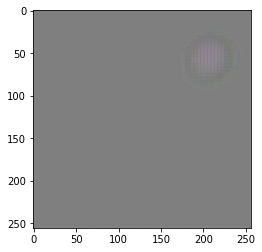

In [10]:
from detect import detect
detect(config=config_detect)

In [7]:
!git pull
!python dataset.py
!python model.py

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/alexjercan/depth-estimation
   8f1787a..0b96c4d  master     -> origin/master
Updating 8f1787a..0b96c4d
Fast-forward
 model.py | 4 ++--
 test.py  | 3 +--
 train.py | 2 +-
 3 files changed, 4 insertions(+), 5 deletions(-)
dataset ok
model ok
